# Netflix Shows & Movies EDA

In [216]:
# Data manipulation & cleaning
import pandas as pd

# EDA Vis - Matplotlib
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

# EDA Vis - Pillow & Word Cloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Any linear algebra problems
import numpy as np

# NLP - Natural Lang. Toolkit - need this library for movie/show reccomendation
import nltk # Won't usually require this, since you want specific packages, but for installation purposes - is required
from nltk.corpus import stopwords # Corpus - collection of written text
from nltk.tokenize import word_tokenize # To tokenize any relevant strings
from nltk.stem import WordNetLemmatizer # To Lemmatize any words
from nltk.probability import FreqDist # To find frequence of tokens, helpful for various EDA

# Regular Expressions
import re

#SkLearn - Recommendation model creation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer # We will need to vectorize the words to find the cosine similarity
from sklearn.metrics.pairwise import cosine_similarity # Cosine Similarity will allow us to understand the similarities between movies or tv shows

# Saving any model(s)
import joblib

## Also import Make Regression from SkLearn - https://www.codespeedy.com/make_regression-function-in-sklearn-with-python/#:~:text=make_regression%20%28%29%20function%20in%20scikit%20learn%20It%20is,in%20python%20below.%20Code%20in%20Python%20programming%20language

In [35]:
# Downloading all recommended packages for NLTK
#nltk.download() # It's my first time using this library 

In [36]:
# Importing data and create a backup 
df = pd.read_csv(r"C:\Users\ssc44611\Documents\L4 Projects\1. Netflix (Personal Proj) - ML Focus\netflix_titles.csv")
df_backup = df.copy()

In [37]:
df.shape

(8807, 12)

#### Manipulation

In [38]:
# Count amount of null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [39]:
# Since null rows won't help us, we should just drop them - we have a backup, so it's okay
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [40]:
# Since null rows have been dropped, the original index will have messed up
# Reset index for new df
df.reset_index(inplace=True)

In [41]:
# Converting date-related data into datetime, to make it formatted to refer to for analysis
# Creating 2 new columns - Year & month, to open more analysis opportunities and more perspectives of date analysis
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

The code above mayn't apply to the end goal of this project, but we can use it for reference in future projects

In [42]:
#df.drop(['index'], axis=1, inplace=True)

In [43]:
# Extracting columns for future reference
cols = df.columns 

In [44]:
# Shape of no null df, we have also have a backup.
df.shape

(5332, 15)

## TV Shows vs Movies - Data Extraction

Further into the notebook we will be looking at a recommendation system - so we need to extract this specific data 

In [45]:
# Distribution of content via type
movies = df.loc[df['type'] == 'Movie']
tv_shows = df.loc[df['type'] == 'TV Show']

# Resetting index for movie & show data
movies.reset_index(inplace=True)
tv_shows.reset_index(inplace=True)

movies.drop(['index'], axis=1, inplace=True) # Droppping 'Index' column since we just reset and created a new index.
tv_shows.drop(['index'], axis=1, inplace=True)

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### EDA

In [46]:
# Print columns to get more aspects of the data to analyse
list(cols) # List makes it easier to read

['index',
 'show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description',
 'year_added',
 'month_added']

#### Distribution Of Movies vs TV Shows

Text(0.5, 1.0, 'Movie vs TV Show - Distribution')

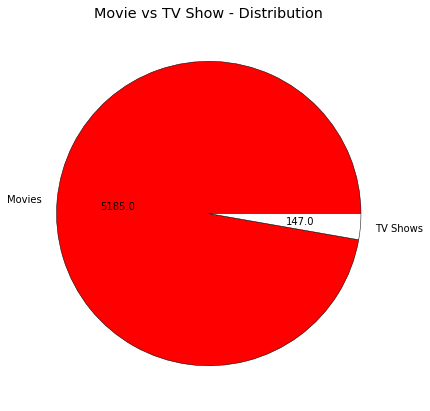

In [47]:
# Distribution Pie
plt.figure(figsize=(10,7))

# Assign values
movies_c = len(movies)
tv_shows_c = len(tv_shows)
m_and_tv_count = np.array([movies_c, tv_shows_c])

# Function to plot values to the pie - this will allow us to assign the data vlaues into the pie
def absolute_value(val):
    a  = np.round(val/100.*m_and_tv_count.sum(), 0)
    return a

labels = ['Movies', 'TV Shows']
plt.pie(m_and_tv_count, labels=labels, colors= ['red', 'white'], wedgeprops={'edgecolor' :'black'},
       autopct=absolute_value)

plt.title('Movie vs TV Show - Distribution')

#### Content Age Ratings Distribution

In [48]:
# Seperating data into ratings 
ratings_m = [len(movies.loc[movies['rating']== 'TV-14']), len(movies.loc[movies['rating']== 'PG-13']), len(movies.loc[movies['rating']== 'PG']), len(movies.loc[movies['rating']== 'R']),
           len(movies.loc[movies['rating']== 'TV-PG']), len(movies.loc[movies['rating']== 'G']), len(movies.loc[movies['rating']== 'TV-Y7']), len(movies.loc[movies['rating']== 'TV-G']),
           len(movies.loc[movies['rating']== 'TV-Y']),len(movies.loc[movies['rating']== 'NC-17']), len(movies.loc[movies['rating']== 'NR']), len(movies.loc[movies['rating']== 'TV-Y7-FV']), 
           len(movies.loc[movies['rating']== 'UR'])]

ratings_tv = [len(tv_shows.loc[tv_shows['rating']== 'TV-14']), len(tv_shows.loc[tv_shows['rating']== 'PG-13']), len(tv_shows.loc[tv_shows['rating']== 'PG']), len(tv_shows.loc[tv_shows['rating']== 'R']),
           len(tv_shows.loc[tv_shows['rating']== 'TV-PG']), len(tv_shows.loc[tv_shows['rating']== 'G']), len(tv_shows.loc[tv_shows['rating']== 'TV-Y7']), len(tv_shows.loc[tv_shows['rating']== 'TV-G']),
           len(tv_shows.loc[tv_shows['rating']== 'TV-Y']),len(tv_shows.loc[tv_shows['rating']== 'NC-17']), len(tv_shows.loc[tv_shows['rating']== 'NR']), len(tv_shows.loc[tv_shows['rating']== 'TV-Y7-FV']), 
           len(tv_shows.loc[tv_shows['rating']== 'UR'])]

total = len(df)
ratings_name = ['TV-14', 'PG-13', 'PG', 'R', 'TV-PG', 'G', 'TV-Y7', 'TV-G', 'TV-Y', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']

## For this cell, NLTK Tokenizing might be better - **ammend at a later point**

In [51]:
#ratings_ordered = np.sort(ratings)[::-1]
#list(ratings_ordered)

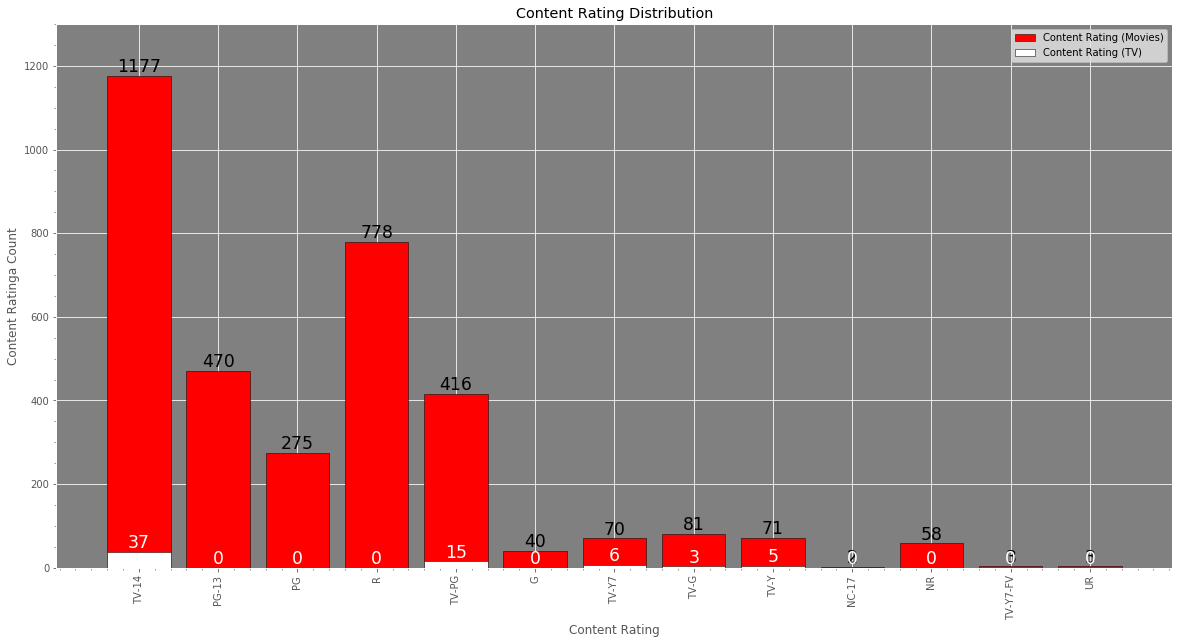

In [52]:
# Bar plots
plt.figure(figsize=(20,10))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

#Plotting bar
mov_rates = plt.bar(ratings_name, ratings_m, color=['red'], label ='Content Rating (Movies)', edgecolor='black')

# Assigning labels on top of the bars
for i in range(len(ratings_name)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,ratings_m[i], ratings_m[i], ha="center", va="bottom", color='black', fontsize='xx-large')
    
tv_show_rates = plt.bar(ratings_name, ratings_tv, color=['white'], label ='Content Rating (TV)', edgecolor='black')


# Assigning labels to axes
plt.xlabel('Content Rating')
plt.xticks(ratings_name, rotation='vertical')
plt.ylabel('Content Ratinga Count')
plt.yticks()
plt.minorticks_on()
plt.title('Content Rating Distribution')
plt.ylim([0,1300]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(ratings_name)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,ratings_tv[i], ratings_tv[i], ha="center", va="bottom", color='white', fontsize='xx-large')

##Present Data
plt.legend()
plt.show()

### Top 10 Movie Genres

In [53]:
movies.head(3)

,level_0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
1,2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
2,3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9


In [227]:
# We want to look at the genres of the movies
# Since we want to tokenize the words, we need to convert the column into dtye: string

#This method allows you to convert the columns into one long string, as needed for the word_tokenize function
mov_genre = movies.listed_in.str.cat(sep=' ')
tv_genre = tv_shows.listed_in.str.cat(sep=' ')

In [228]:
# Now that we have the column as one long string, we can tokenize the words
mov_desc_tokens = word_tokenize(mov_genre)
len(mov_desc_tokens)

26882

In [229]:
tv_desc_tokens = word_tokenize(tv_desc) # 
len(tv_desc_tokens)

1218

#### Let's filter the tokens

In [230]:
# We will call this variable for filtering the tokens
stop_words = set(stopwords.words('english')) # 'english' is the default English word recognition by NLTK
## Modify the stopwords - search it up - remove punctuation

In [231]:
f_mov_desc_tokens = [] # Filtering Movie tokens to just English words
for w in mov_desc_tokens:  # For loop iterates through the entire TV Show token list
    if w not in stop_words:  # Finding any words not in the English 'Stop words'
        f_mov_desc_tokens.append(w) # Appends the new variable with just those tokens that meeting NLTK's English tokens

f_tv_desc_tokens = [] # Filtering TV-Show tokens to just English words
for w in tv_desc_tokens: # For loop iterates through the entire TV Show token list
    if w not in stop_words: # Finding any words not in the English 'Stop words'
        f_tv_desc_tokens.append(w) # Appends the new variable with just those tokens that meeting NLTK's English tokens

In [232]:
len(f_mov_desc_tokens)

26882

In [233]:
len(f_tv_desc_tokens)

1218

The length of the tokens are the same, but the non-english words or words that don't help our analysis are removed.

In [234]:
# Gathering frequency of token occurence

 # Variable to contain to function for this specific use
freq_m_d_t = FreqDist() # Movies

freq_tv_d_t = FreqDist() # TV Shows


In [235]:
# Loop to count occurence of each token - Movies
for word in f_mov_desc_tokens:
    freq_m_d_t[word.lower()]+=1 # "+=1" - increases count of each occurence by 1
freq_m_d_t 

FreqDist({',': 6306, 'movies': 4960, 'international': 2369, 'dramas': 2293, '&': 1895, 'comedies': 1553, 'action': 806, 'adventure': 806, 'independent': 740, 'romantic': 579, ...})

In [236]:
#Length of the unique values in the description 
# Movie tokens
len(freq_m_d_t)

29

In [237]:
# Loop to count occurence of each token - Movies
for word in tv_desc_tokens:
    freq_tv_d_t[word.lower()]+=1
freq_tv_d_t

FreqDist({'tv': 332, ',': 220, 'shows': 206, 'international': 87, 'dramas': 52, 'crime': 38, '&': 32, 'comedies': 30, 'british': 21, 'romantic': 21, ...})

In [238]:
#Length of the unique values in the description 
# TV Show tokens
len(freq_tv_d_t)

33

      TOTAL TOKENS       
      _________________
    - Movies : 26882   
    - TV Shows : 1218  
    
      UNIQUE TOKENS          
      _________________
    - Movies : 29        
    - TV Shows : 33  

In [239]:
# Variable to store the top 'x' most common tokens
freq_mdt_t10 = freq_m_d_t.most_common(16)
freq_mdt_t10

[(',', 6306),
 ('movies', 4960),
 ('international', 2369),
 ('dramas', 2293),
 ('&', 1895),
 ('comedies', 1553),
 ('action', 806),
 ('adventure', 806),
 ('independent', 740),
 ('romantic', 579),
 ('thrillers', 547),
 ('children', 503),
 ('family', 503),
 ('documentaries', 391),
 ('horror', 336),
 ('stand-up', 294)]

In [240]:
freq_tvdt_t10 = freq_tv_d_t.most_common(16)
freq_tvdt_t10

[('tv', 332),
 (',', 220),
 ('shows', 206),
 ('international', 87),
 ('dramas', 52),
 ('crime', 38),
 ('&', 32),
 ('comedies', 30),
 ('british', 21),
 ('romantic', 21),
 ('docuseries', 14),
 ('action', 13),
 ('adventure', 13),
 ('kids', 13),
 ("'", 13),
 ('stand-up', 11)]

We can focus on actual genres, the genres we're going to plot are:

      MOVIES                     TV SHOWS
      _____________________________________________
    - International: 2369   |   - International: 87  
    - Dramas : 2293         |   - Dramas : 52
    - Comedy : 1553         |   - Crime : 38
    - Action : 806          |   - Comedy : 30
    - Adventure : 806       |   - British : 21
    - Romantic : 579        |   - Romantic : 21
    - Thrillers : 547       |   - Docuseries : 14
    - Family : 503          |   - Action : 13
    - Documentaries : 391   |   - Adventure : 13
    - Horror : 336          |   - Kids : 13
    
We can ignore some of the values since they aren't genres...

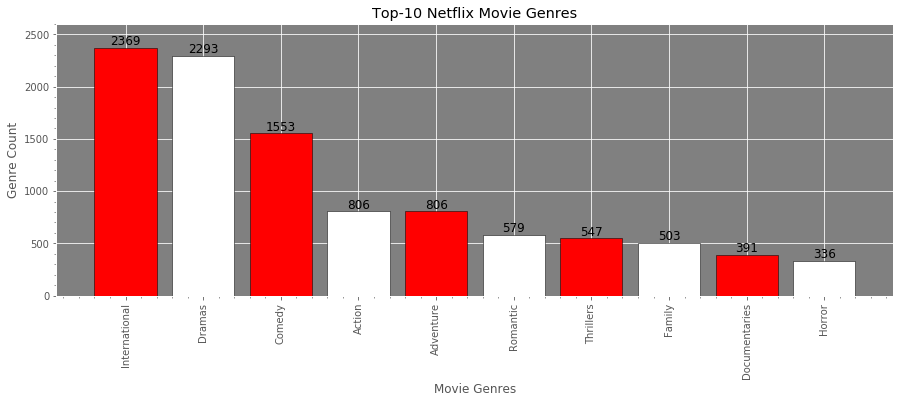

In [241]:
# Plotting 1st Bar Graph - Movie Genres

# Contain values
mov_genres_x = ['International', 'Dramas', 'Comedy', 'Action', 'Adventure', 'Romantic', 'Thrillers', 'Family', 'Documentaries', 'Horror']
mov_values_y = [2369,2293,1553,806,806,579,547,503,391,336]

# Set bar size and background
plt.figure(figsize=(15,5))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Plot data
mov_bar_genre_freq10 = plt.bar(mov_genres_x, mov_values_y, label = 'Top 10 Genres (Movies)', color =['red','white'], edgecolor=['black'])

# Assigning values to graph axes
plt.yticks()
plt.ylabel('Genre Count')
plt.xticks(mov_genres_x, rotation= 'vertical')
plt.xlabel('Movie Genres')
plt.minorticks_on()
plt.title('Top-10 Netflix Movie Genres')
plt.ylim([0,2600]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(mov_genres_x)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i,mov_values_y[i], mov_values_y[i], ha="center", va="bottom", color='black', fontsize='large')



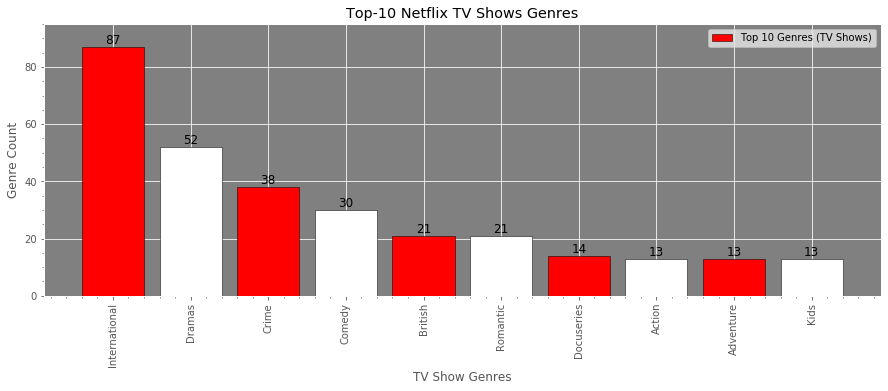

In [242]:
# Plotting 2nd Bar Graph - TV Show Genres

# Contain Values
tvs_genres_x = ['International','Dramas','Crime','Comedy','British','Romantic','Docuseries','Action','Adventure','Kids']
tvs_values_y = [87,52, 38, 30, 21, 21, 14, 13, 13, 13]

# Setgraph size and background
plt.figure(figsize=(15,5))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Plot graph
tv_bar_genre_freq10 = plt.bar(tvs_genres_x, tvs_values_y, label = 'Top 10 Genres (TV Shows)', color =['red','white'], edgecolor=['black'])

# Assigning values to graph axes
plt.yticks()
plt.ylabel('Genre Count')
plt.xticks(tvs_genres_x, rotation= 'vertical')
plt.xlabel('TV Show Genres')
plt.minorticks_on()
plt.title('Top-10 Netflix TV Shows Genres')
plt.ylim([0,95]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(tvs_genres_x)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i, tvs_values_y[i], tvs_values_y[i], ha="center", va="bottom", color='black', fontsize='large')
    
##Present Data
plt.legend()
plt.show(mov_bar_genre_freq10,  tv_bar_genre_freq10)


### Content By Country

In [243]:
# Extracting Country Data
countries_m = movies['country']
countries_tv = tv_shows['country']

In [244]:
# Convert both to strings
countries_m_s = countries_m.str.cat(sep=' ')
countries_tv_s = countries_tv.str.cat(sep=' ') # split by the comma after country

In [245]:
# Splitting strings into names 
countries_m_s_split = countries_m_s.split(',') # The split() function is better for this situation, tokenize would tokenize the first
countries_tv_s_split = countries_tv_s.split(',') # and last names of the actors - not helpful for this analysis.

#### Get help from Shanghua ^^^


In [74]:
# Countries, Movies - Filter
filt_countries_ms = []
for w in countries_m_s_split:
    if w not in stop_words:
        filt_countries_ms.append(w)
        
# Countries, Movies = Filter
filt_countries_tvs = []

for w in countries_tv_s_split:
    if w not in stop_words:
        filt_countries_tvs.append(w)

filt_countries_ms

['United States',
 ' Ghana',
 ' Burkina Faso',
 ' United Kingdom',
 ' Germany',
 ' Ethiopia United States Germany',
 ' Czech Republic India United States United States United States',
 ' India',
 ' France China',
 ' Canada',
 ' United States United States United States United States United States South Africa',
 ' United States',
 ' Japan United States Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Japan Nigeria United States Nigeria Spain',
 ' United States United Kingdom',
 ' United States United States India United States India United Kingdom',
 ' Australia',
 ' France India India United Kingdom',
 ' Australia',
 ' France',
 ' United States India United States',
 ' Canada Germany',
 ' United States United States South Africa',
 ' United States United States',
 ' Mexico United States',
 ' Italy',
 ' France',
 ' Japan United States',
 ' Italy',
 ' Romania',
 ' United Kingdom Australia',
 ' United States United States United States Argentina',
 ' Venezuela United Sta

### EDA On Actor Data 

#### *find new title for this segment*

In [75]:
# Extracting cast data
actors_m = movies['cast']
actors_tv = tv_shows['cast']

In [76]:
# Convert data into a str
actors_m_s = actors_m.str.cat(sep=' ')
actors_tv_s = actors_tv.str.cat(sep=' ')

In [77]:
# Splitting strings into names 
actors_m_s_split = actors_m_s.split(',') # The split() function is better for this situation, tokenize would tokenize the first
actors_tv_s_split = actors_tv_s.split(',') # and last names of the actors - not helpful for this analysis.

In [78]:
# Movie Actors - Filter
filt_actors_ms = []

for w in actors_m_s_split:
    if w not in stop_words:
        filt_actors_ms.append(w)
        
# TV Actors - Filter
filt_actors_tvs = []

for w in actors_tv_s_split:
    if w not in stop_words:
        filt_actors_tvs.append(w)

In [79]:
 # Assign FreqDist() function to a variable to store the most common actors for TV Shows and Movies
freq_actors_m = FreqDist()
freq_actors_tv = FreqDist()

In [80]:
# Counting actor appearances - Movies
for word in filt_actors_ms:
    freq_actors_m[word.lower()]+=1

# Counting actor appearances - TV Shows
for word in filt_actors_tvs:
    freq_actors_tv[word.lower()]+=1
    
freq_actors_m

FreqDist({' anupam kher': 36, ' om puri': 27, ' paresh rawal': 25, ' kareena kapoor': 20, ' boman irani': 19, ' yashpal sharma': 17, ' naseeruddin shah': 16, ' amrish puri': 16, ' tinnu anand': 15, ' vijay raaz': 15, ...})

In [81]:
# Most common actors - Movies
freq_mact_t15 = freq_actors_m.most_common(15)

# Most common actors - TV Shows
freq_tvact_t15 = freq_actors_tv.most_common(15)
freq_mact_t15

[(' anupam kher', 36),
 (' om puri', 27),
 (' paresh rawal', 25),
 (' kareena kapoor', 20),
 (' boman irani', 19),
 (' yashpal sharma', 17),
 (' naseeruddin shah', 16),
 (' amrish puri', 16),
 (' tinnu anand', 15),
 (' vijay raaz', 15),
 (' gulshan grover', 15),
 (' rajesh sharma', 14),
 (' kay kay menon', 14),
 (' asrani', 14),
 (' willem dafoe', 13)]

In [82]:
freq_tvact_t15

[(' maxi iglesias', 2),
 (' prakash raj', 2),
 (' gautham vasudev menon', 2),
 (' anjali', 2),
 (' john boyega', 2),
 (' hsia teng-hung', 2),
 (' katie mcgrath', 2),
 (' young dais', 2),
 (' river huang', 2),
 (' bae doona', 2),
 (' kim sang-ho', 2),
 (' bryce papenbrook', 2),
 (' carrie keranen', 2),
 (' stephanie sheh', 2),
 (' ben diskin', 2)]

                         TOP 15 Actors

             MOVIES                      TV SHOWS
      _______________________________________________________
      - Anupam Kher : 36       |  - Maxi Iglesias : 2
      - Om Puri : 27           |  - Prakash Raj : 2
      - Paresh Rawal : 25      |  - Gautham Vasudev Menon : 2
      - Kareena Kapoor : 20    |  - Anjali : 2
      - Boman Irani : 19       |  - John Boyega : 2
      - Yashpal Sharma : 17    |  - Hsia Teng-Hung : 2
      - Naseeruddin Shah : 16  |  - Katie McGrath : 2
      - Amrish Puri : 16       |  - Young Dais : 2
      - Tinnu Anand : 15       |  - River Huang :2
      - Vijay Raaz : 15        |  - Bae Doona : 2
      - Gulshan Grove : 15     |  - Kim Sang-Ho : 2
      - Rajesh Sharma : 14     |  - Bryce Papenbrook : 2
      - Kay Kay Menon : 14     |  - Carrie Keranen : 2
      - Asrani : 14            |  - Stephanie Sheh : 2
      - Willem Dafoe : 13      |  - Ben Diskin : 2
      
###### May not be worth it to visualise TV Show actors, since they all appeared twice.

In [261]:
# Extracting relevant values - Movie Actors
m_t15_actors_names = ['Anupam Kher', 'Om Puri', 'Paresh Rawal', 'Kareena Kapoor', 'Boman Irani', 'Yashpal Sharma', 'Naseeruddin Shah', 
'Amrish Puri', 'Tinnu Anand', 'Vijay Raaz', 'Gulshan Grove', 'Rajesh Sharma', 'Kay Kay Menon', 'Asrani', 'Willem Dafoe']
m_t15_actors_values = [36, 27, 25, 20, 19, 17, 16, 16, 15, 15, 15, 14, 14, 14, 13]

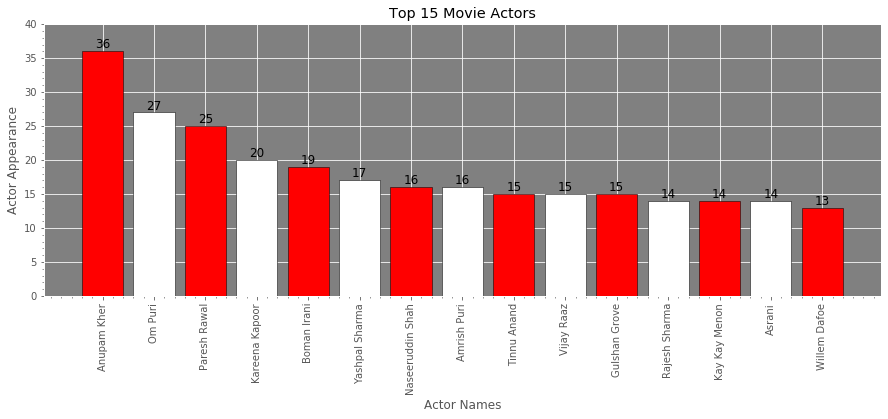

In [84]:
# Plotting Top 15 Actors - Movies

# Setgraph size and background
plt.figure(figsize=(15,5))
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Plot graph
bar_mov_actors_t15 = plt.bar(m_t15_actors_names, m_t15_actors_values, label = 'Top 15 Actors (Movies)', color =['red','white'], edgecolor=['black'])

# Assigning values to graph axes
plt.yticks()
plt.ylabel('Actor Appearance')
plt.xticks(m_t15_actors_names, rotation= 'vertical')
plt.xlabel('Actor Names')
plt.minorticks_on()
plt.title('Top 15 Movie Actors')
plt.ylim([0,40]) # Ammending the y axis limit

# Assigning labels on top of the bars
for i in range(len(m_t15_actors_names)): # ;='for' loop allows us to assign the values on every bar in one line of code
    plt.text(i, m_t15_actors_values[i], m_t15_actors_values[i], ha="center", va="bottom", color='black', fontsize='large')

Text(0.5, 1.0, 'Top 15 Movie Actors - Netflix')

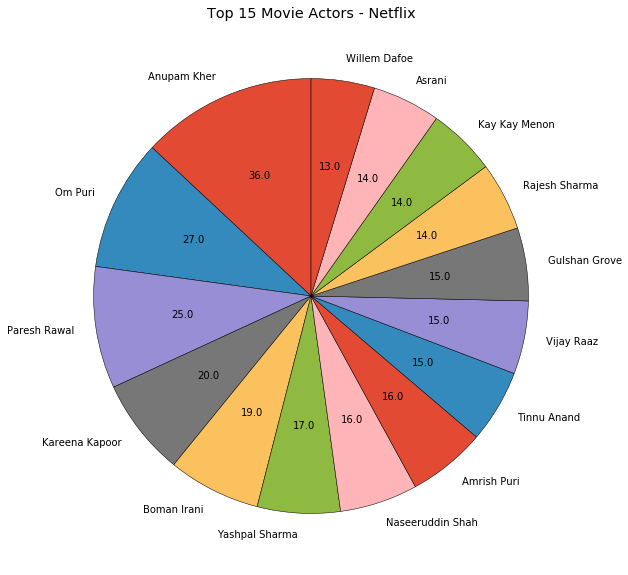

In [85]:
# Distribution Pie of Top 15 movie actors - Netflix
m_t15_actors_values_arr = np.array(m_t15_actors_values) # We have to convert this data into an array

plt.figure(figsize=(15,10))

# Function to plot values to the pie - this will allow us to assign the data vlaues into the pie
def absolute_value(val):
    a  = np.round(val/100.*m_t15_actors_values_arr.sum(), 0)
    return a

# Plot pie
plt.pie(m_t15_actors_values, labels=m_t15_actors_names, wedgeprops={'edgecolor' :'black'},
       startangle = 90, autopct=absolute_value) # "absolute_value" - is the variable from the function above

#Set title and values to pie
plt.title('Top 15 Movie Actors - Netflix')

## Recommendation System - NLTK

In this section we will be creating an algorithm that recommends movies and shows, relevant to what the viewer is watching.

In [174]:
# Calling Movie & TV Show data
## We will only require some of the data here, so we'll slice it further
movies_rec = movies[['title','director','country','listed_in', 'description']]
movies_rec.head()

,title,director,country,listed_in,description
0,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...","Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,The Starling,Theodore Melfi,United States,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic","Dramas, International Movies",After most of her family is murdered in a terr...
3,Jeans,S. Shankar,India,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
4,Grown Ups,Dennis Dugan,United States,Comedies,Mourning the loss of their beloved junior high...


#### Cleaning The Descriptions

In [87]:
# Splitting up every movie's description, into one long string, seperated by; "" 
unique_feats = [] # Unique features

for i in range(movies_rec.shape[0]): # This loop will allow us to get all of the unique descriptions out, instead of tokenizing it
    unique_feats.append(" ".join(list(movies_rec.iloc[i].values)))

unique_feats

['Sankofa Haile Gerima United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia Dramas, Independent Movies, International Movies On a photo shoot in Ghana, an American model slips back in time, becomes enslaved on a plantation and bears witness to the agony of her ancestral past.',
 "The Starling Theodore Melfi United States Comedies, Dramas A woman adjusting to life after a loss contends with a feisty bird that's taken over her garden — and a husband who's struggling to find a way forward.",
 'Je Suis Karl Christian Schwochow Germany, Czech Republic Dramas, International Movies After most of her family is murdered in a terrorist bombing, a young woman is unknowingly lured into joining the very group that killed them.',
 'Jeans S. Shankar India Comedies, International Movies, Romantic Movies When the father of the man she loves insists that his twin sons marry twin sisters, a woman creates an alter ego that might be a bit too convincing.',
 'Grown Ups Dennis Dugan United S

##### Convert Into Generator
    
lem=nltk.WordNetLemmatizer()
corpus=[]

for i in range(len(unique_feats)):

    review=re.sub('[^a-zA-Z]',' ',unique_feats[i])
    
    review=review.lower()
    
    review=review.split() 
    
    review=[lem.lemmatize(w) for w in review if w not in set(stopwords.words('english'))]
    
    review=' '.join(review)
    
    corpus.append(review)

##### INTO (Below - Format)

###### Generator comprehension equivalent

one_to_a_hundred = (x for x in range(1, 101))

#for number in one_to_a_hundred:
    print(number)
    


In [178]:
lem=nltk.WordNetLemmatizer()
corpus=[]

for i in range(len(unique_feats)):
    review=re.sub('[^a-zA-Z]',' ',unique_feats[i])
    review=review.lower()
    review=review.split() 
    review=[lem.lemmatize(w) for w in review if w not in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

##### Figure out how to make the 'for' loop above into a generator.
    - Currently take 15 years to run

In [214]:
movies_rec['Uni_Features'] = corpus
movies_rec.tail()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,title,director,country,listed_in,description,Uni_Features
5180,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan","Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,zinzana majid al ansari united arab emirate jo...
5181,Zodiac,David Fincher,United States,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",zodiac david fincher united state cult movie d...
5182,Zombieland,Ruben Fleischer,United States,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,zombieland ruben fleischer united state comedy...
5183,Zoom,Peter Hewitt,United States,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",zoom peter hewitt united state child family mo...
5184,Zubaan,Mozez Singh,India,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,zubaan mozez singh india drama international m...


#### Movie Word Cloud

In [250]:
mov_description = movies_rec['Uni_Features'].str.cat(sep=' ')

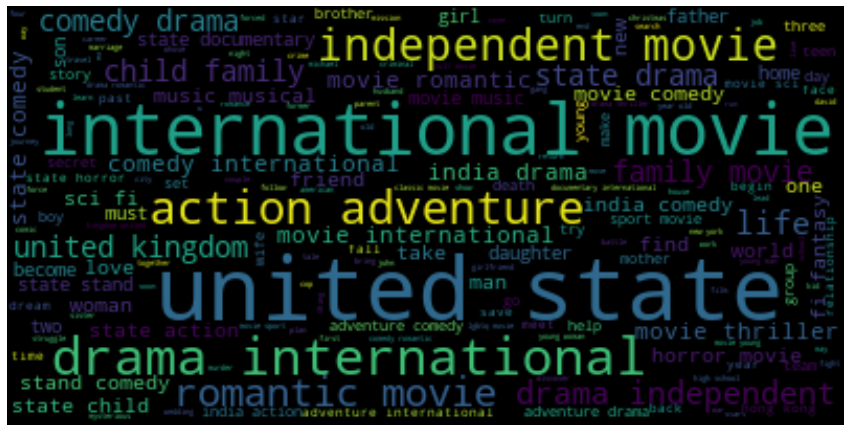

In [260]:
# Plotting wordcloud
text = mov_description # Put string into a variable
plt.figure(figsize=[15,10]) # Set figure size
ax = plt.gca() # Calling 'gca()' - allowing us to change the background of the graph
ax.set_facecolor('grey')

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text) # Call WordCloud() to generate an image to plot string

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear',) # Using matplotlib library to present word cloud

# Edit end word cloud plot
wordcloud = WordCloud(max_font_size=100).generate(text) # Setting max font size
plt.axis("off") # Removes axes and any grid lines, withod the words may get blocked - ruins general viz quality
plt.show()

#### Vectorising Description Values

In [110]:
# Vectorizing the values in the description columns to get consine similarity
cv = CountVectorizer()
cv_mov_desc = cv.fit_transform(movies_rec['Uni_Features'])
cv_mov_desc

<5185x19285 sparse matrix of type '<class 'numpy.int64'>'
	with 121983 stored elements in Compressed Sparse Row format>

In [111]:
# Above is a sparse matrix, using .toarray(), will allow us to show our matrix
### *** Look-up what a matrix is ***
cv_mov_desc.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#### Finding Cosine Similarity

In [112]:
# Finding CS 
cs = cosine_similarity(cv_mov_desc) # Looking at how the values correlate with one another. % Based
cs

array([[1.        , 0.13977131, 0.17069719, ..., 0.17069719, 0.16012815,
        0.16343011],
       [0.13977131, 1.        , 0.09304842, ..., 0.18609684, 0.17457431,
        0.08908708],
       [0.17069719, 0.09304842, 1.        , ..., 0.04545455, 0.08528029,
        0.17407766],
       ...,
       [0.17069719, 0.18609684, 0.04545455, ..., 1.        , 0.17056057,
        0.04351941],
       [0.16012815, 0.17457431, 0.08528029, ..., 0.17056057, 1.        ,
        0.08164966],
       [0.16343011, 0.08908708, 0.17407766, ..., 0.04351941, 0.08164966,
        1.        ]])

In [146]:
cs.shape

(5185, 5185)

### Movie Recommendation System

In [212]:
#let's write a function to get recommendations for given movie

def movie_reco(title): # Input a movie title to get recommendations
    
    # Index of movies
    movie_index= movies_rec[[title in name for name in movies_rec["title"]]].index[0]
    
    # Similarity score for input movie title and matching movie titles
    similarity_score=list(enumerate(cs[movie_index]))
    
    #sorted similarity scores for given movie title (Descending order)
    similarity_score=sorted(similarity_score,key=lambda x:x[1],reverse=True)
    
    # Top 10 simillar scores
    similarity_score=similarity_score[1:11]
    
    # Getting index of the top 10 movies with simillar scores
   # movie_indices=[idx[0] for idx in similarity_score]
    
    # Return the movie title with matching
    return movies_reco[movies_reco['title'][movie_indices]]

In [213]:
movie_reco['Jeans']

TypeError: 'function' object is not subscriptable

##### Recommendation System Not Working!!! WHYYYY